In [1]:
import numpy as np

### Part-1: Only Forward propagation

In [2]:
## This is the basic forward propagation code with -->[2] -->[2] -->[1] nodes

'''
Creating ANN with 3 layeers, One input, One hidden and one Output layer 
Input layer: 2 nodes x0,x1 
Hidden layer: 2 nodes x2, x3
Output layer: 1 node x4
''' 

## Defining the weights 
weights =  {
    'x2':np.array([1,1]),
    'x3':np.array([-1,1]),
    'x4':np.array([2,-1])    
}

## Data is initialized 
data = np.array([2,3]) 
x0 = data[0]
x1 = data[1] 

## Creating the input layer
Input_layer = np.array([x0,x1])

## Caclculating the summation for the hidden layer 
x2 = (Input_layer*weights['x2']).sum() 
x3 = (Input_layer*weights['x3']).sum()

hidden_layer = np.array([x2,x3]) ## Storing the hidden layer nodes 

x4 = (hidden_layer*weights['x4']).sum()
output_layer = np.array([x4]) 
 
print(f"Output: {output_layer}") 

# General notation is that the number of hidden layers = no.of layers, since input and output layer will always be present.

Output: [9]


In [3]:
## Now creating a 2 layered neural network 

weights = {
    'x2':np.array([1,1]),
    'x3':np.array([-1,1]),
    'x4':np.array([2,-1]), 
    'x5':np.array([1,0]), 
    'x6':np.array([3,1])
} 

data = np.array([3,4]) 
Input_layer = np.array([data[0], data[1]]) 

## First hidden layer 
x2 = (Input_layer*weights['x2']).sum() 
x3 = (Input_layer*weights['x3']).sum() 

hidden_layer_1 = np.array([x2,x3]) 

## Second hidden layer 
x4 = (hidden_layer_1*weights['x4']).sum() 
x5 = (hidden_layer_1*weights['x5']).sum() 

hidden_layer_2 = np.array([x4,x5])  

## Output layer 

x6 = (hidden_layer_2*weights['x6']).sum() 
output_layer = np.array([x6])
print(f"Output: {output_layer}")

Output: [46]


### Part-2: Creating Activation functions

In [4]:
## Binary step function 
''' 
f(x) = 0 for x < 0 
       1 for x > 0
'''
def binaryFun(x):
    return 1 if x>0 else 0


## Binary step function 
''' 
f(x) = 0 for x < 0 
       1 for x > 0
'''
def binaryFun(x):
    return 1 if x>0 else 0


## ReLu 
'''
f(x) = x for x >= 0 
       0 for x < 0
''' 
def relu(x):
    ##return  max(x,0) or 
    return x if x>=0 else 0 


## Sigmoid or Logistic
'''
f(x) = 1 / ( 1 + e**(-x) )
''' 
def sigmoid(x):
    return 1/(1+np.exp(-x))



## Example use-case
x = np.array([-4,2,1,89,0,-5]) 
sigmoid(x)


array([0.01798621, 0.88079708, 0.73105858, 1.        , 0.5       ,
       0.00669285])

In [5]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth enabled for GPU.")
    except RuntimeError as e:
        print(f"Failed to set memory growth: {e}")


2025-06-08 17:53:51.303744: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-08 17:53:51.326081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749385431.351283   71676 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749385431.358989   71676 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-08 17:53:51.385006: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Memory growth enabled for GPU.


#### Part-2 (a): For better understanding implemting iris dataset prediction using tensorflow

In [6]:
## Predicting the infamous flower-prediction 
import numpy as np
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense


In [7]:
iris = load_iris() 
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
x_train,x_test, y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1)

In [15]:
## Building the model 
Iris_Model = Sequential() 

Input_layer = Dense(4, input_shape=(4,)) 
hidden_layer = Dense(4, activation='relu') 
output_layer = Dense(3, activation= 'softmax')

Iris_Model.add(Input_layer)
Iris_Model.add(hidden_layer)
Iris_Model.add(output_layer)

#### Compiling the model 
Iris_Model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


## Training the model 
Iris_hist = Iris_Model.fit(x_train, y_train, epochs= 100, batch_size=4, validation_data = (x_test, y_test)) 


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4054 - loss: 1.1405 - val_accuracy: 0.5667 - val_loss: 1.0674
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6463 - loss: 0.9965 - val_accuracy: 0.5333 - val_loss: 1.0424
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7003 - loss: 0.8965 - val_accuracy: 0.5333 - val_loss: 1.0213
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6383 - loss: 0.8886 - val_accuracy: 0.5333 - val_loss: 0.9909
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6944 - loss: 0.8338 - val_accuracy: 0.5667 - val_loss: 0.9546
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6306 - loss: 0.8470 - val_accuracy: 0.5667 - val_loss: 0.9195
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6740 - loss: 0.7834 - val_accuracy: 0.5667 - val_loss: 0.8861
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6250 - loss: 0.7670 - val_accuracy: 0.

In [13]:
## Plotting the graphs 
import matplotlib.pyplot as plt

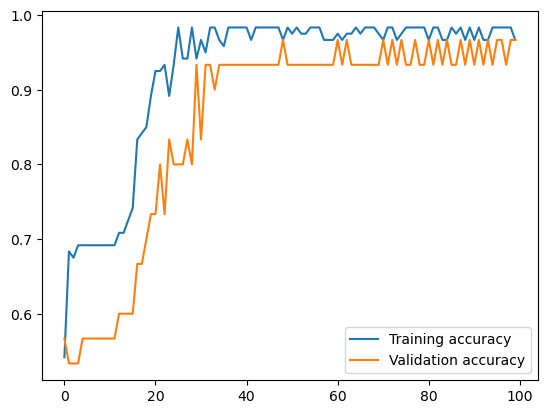

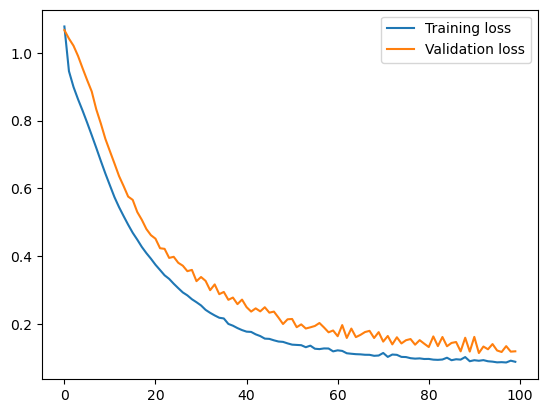

In [21]:
plt.plot(Iris_hist.history['accuracy'], label="Training accuracy" )  
plt.plot(Iris_hist.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.show()

plt.plot(Iris_hist.history['loss'], label="Training loss") 
plt.plot(Iris_hist.history['val_loss'], label="Validation loss")
plt.legend()
plt.show()



In [23]:
Iris_Model.save("Iris_model.keras")